<a href="https://colab.research.google.com/github/9-coding/DataScience/blob/main/california_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing() 

type(data)

df = pd.DataFrame(data=data.data, 
                  columns=data.feature_names)

df.head()
df.info() 

X = df.iloc[:,0:9] # independent columns
y = df.iloc[:,-1] # target column, i.e., price range

# Univariate Selection using SelectKBest
kbest = SelectKBest(score_func=f_regression, k=5)
X_kbest = kbest.fit_transform(X, y)

# Get top features
mask = kbest.get_support()
top_features = X.columns[mask]

print(top_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Latitude'], dtype='object')


Top Features selected by SelectKBest:  Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude'], dtype='object')
Top Features selected by Feature Importance Scoring:  ['MedInc' 'AveOccup' 'Latitude' 'Longitude' 'HouseAge']


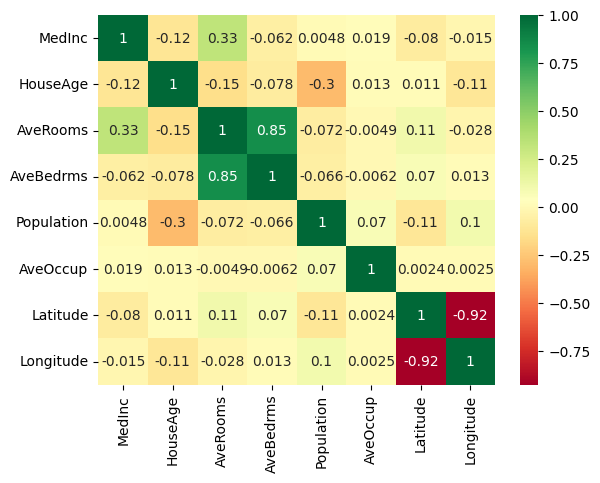

In [ ]:
# from chatGPT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Load data
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data
y = california_housing.target

# Univariate Selection using SelectKBest
kbest = SelectKBest(score_func=f_regression, k=5)
X_kbest = kbest.fit_transform(X, y)

# Get top features
mask = kbest.get_support()
top_features = X.columns[mask]

# Feature Importance Scoring using Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X, y)
importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
top_importances = importances.head(5)['feature'].values

# Correlation Matrix Heatmap
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn')

print("Top Features selected by SelectKBest: ", top_features)
print("Top Features selected by Feature Importance Scoring: ", top_importances)

        Specs         Score
0      MedInc  18556.571631
2    AveRooms    487.757462
6    Latitude    438.005453
1    HouseAge    232.841479
3   AveBedrms     45.108576
7   Longitude     43.698976
4  Population     12.547410
5    AveOccup     11.635342


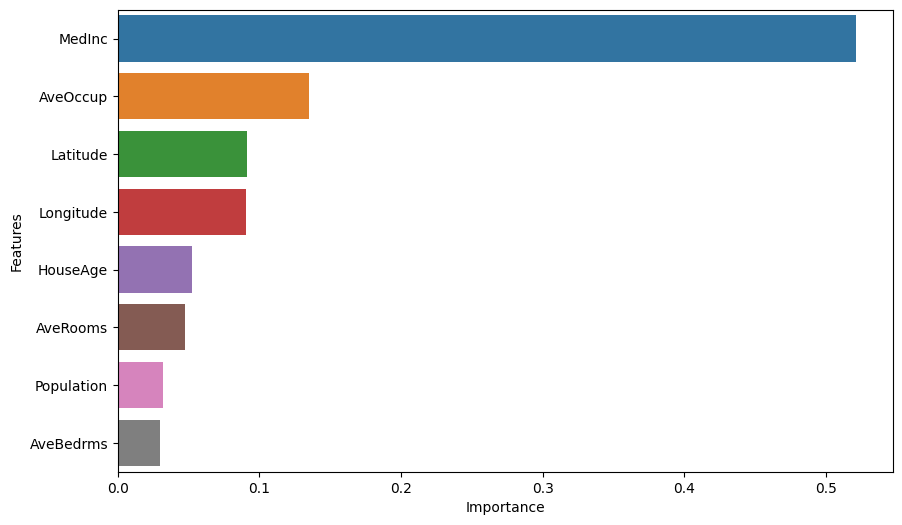

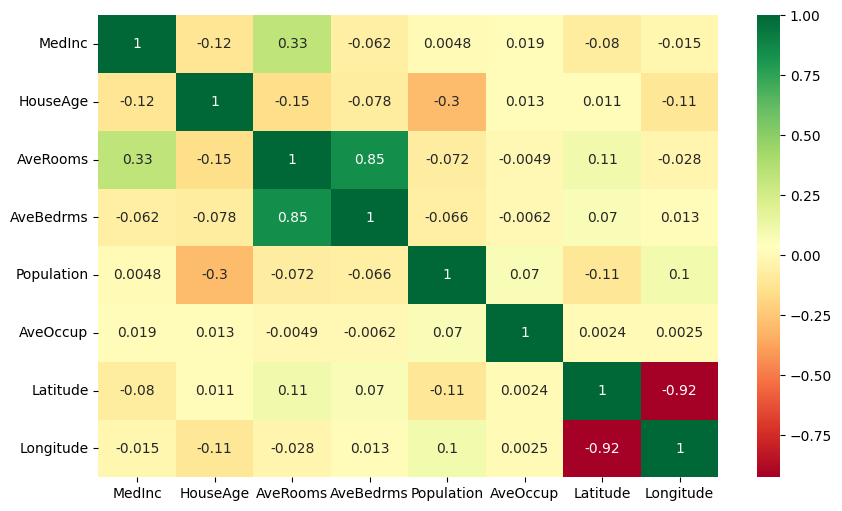

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Check data
df.head()

# Univariate feature selection with SelectKBest class
bestfeatures = SelectKBest(score_func=f_regression, k=5)
X_new = bestfeatures.fit_transform(df, data.target)
selected_features = df.columns[bestfeatures.get_support()]

# Print the feature scores
featureScores = pd.DataFrame({'Specs': df.columns, 'Score': bestfeatures.scores_})
print(featureScores.nlargest(10, 'Score')) # print 10 best features


# Feature importance scoring
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df, data.target)
#feat_importances = pd.DataFrame({'Features': df.columns, 'Importance': model.feature_importances_})
#feat_importances = importances.sort_values('Features', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Features', data=importances)
plt.show()


# Plot correlation matrix heatmap
corrmat = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')
plt.show()

        Specs         Score
0      MedInc  18556.571631
2    AveRooms    487.757462
6    Latitude    438.005453
1    HouseAge    232.841479
3   AveBedrms     45.108576
7   Longitude     43.698976
4  Population     12.547410
5    AveOccup     11.635342


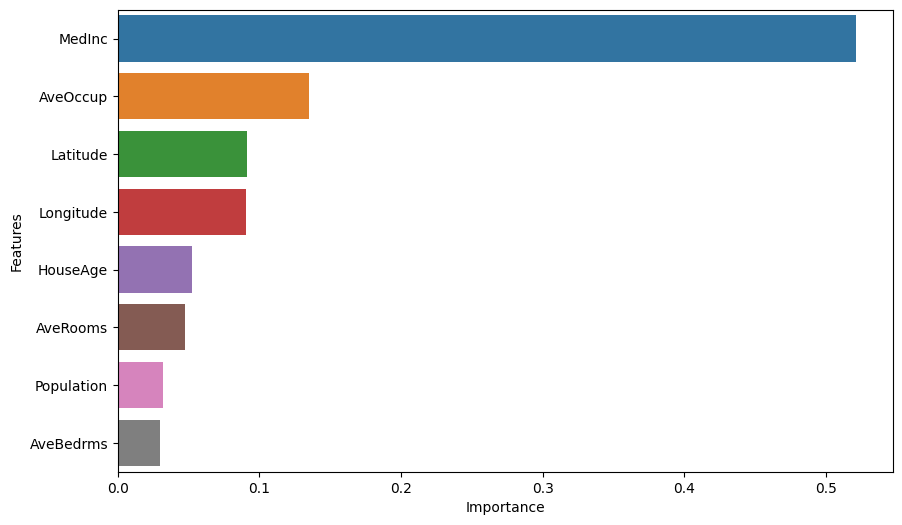

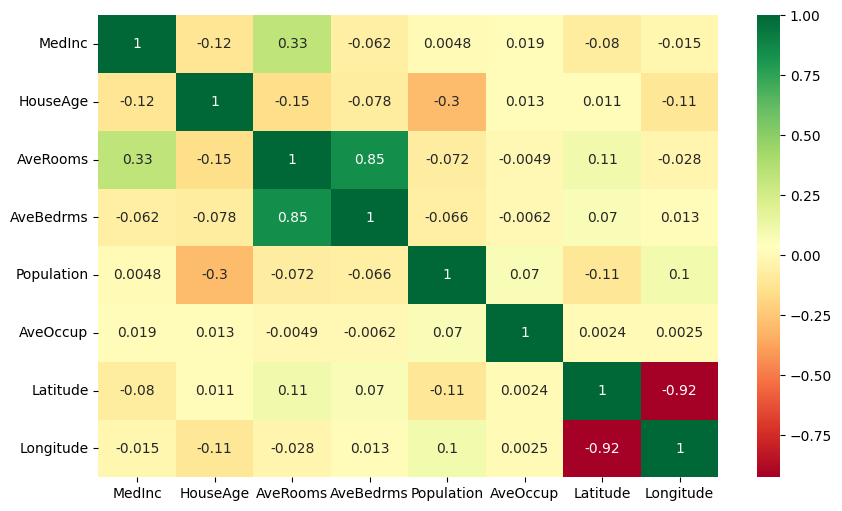

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Check data
df.head()

# Univariate feature selection with SelectKBest class
bestfeatures = SelectKBest(score_func=f_regression, k=5)
X_new = bestfeatures.fit_transform(df, data.target)
selected_features = df.columns[bestfeatures.get_support()]

# Print the feature scores
featureScores = pd.DataFrame({'Specs': df.columns, 'Score': bestfeatures.scores_})
print(featureScores.nlargest(10, 'Score')) # print 10 best features


# Feature importance scoring
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df, data.target)
feat_importances = pd.DataFrame({'Features': df.columns, 'Importance': model.feature_importances_})
feat_importances = importances.sort_values(by='Features')
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Features', data=importances)
plt.show()


# Plot correlation matrix heatmap
corrmat = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')
plt.show()